# PROJECT OVERVIEW :
# EMPLOYEE PERFORMANCE ANALYSIS (INX FUTURE INC.)

INX Future Inc. is a data analytics and automation solutions provider with 15yrsof global business presence. It has been rated as top 20 best employers for the past 5yrs.

Despite it's human resource policies being considered as the best in the industry,employees performance indexes has been declining and service delivery has gone down by 8% points,which has caused concerns among the top management.

Mr.Brain,the CEO, has initiated a project which analyses the current employee's data to find the core underlying causes of the issues while maintaining employees morale and positive working environment.

This project, therefore, aims to discover-:
1.what factors are the most influencing performance

2.which departments are struggling

3.how can INX improve performance

## **Project Objectives** 
1. Identify how performance varies across departments and highlighting area of concern.
2. Use statistical and machine learning techniques to determine the strongest factors influencing performance.
3. Build a machine learning model capable of predicting employee performance using key features to support HR in hiring decisions and identifying low performers.
4. Provide strategic, evidence based suggestions for improving employee performance and organisation's productivity.


### Dataset Description

The dataset contains employees information such as :

 - Demographics (age,gender)
 - Professional backgrounds
 - Departments and roles
 - Work environment factors
 - Performance indicators
 - Survey responses
 - Training and evaluation scores

It has 1200 entries and 28 columns 

### **Project Scope And Deliverables**

- Exploratory Data Analysis
- Department level performance insights 
- Feature importance and key drivers
- Predictive models
- Recommendations


***Business Value***

The project will:
1. Help the company identify underlying causes of performance decline
2. Enable proactive workforce management
3. Improve employees system
4. Prevent further drop in customer satisfaction
5. Strengthen hiring process through predictive analysis




In [3]:
#import necesarry libraries and loading the data
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
#data summary
print(data.info(), '\n')
print('--'*30)
print(data.describe(), '\n')
print('--'*30)
print(data.shape,'\n')
print('--'*30)
print(data.isnull().sum(), '\n')
print('--'*30)
print(data.duplicated().sum(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Data Cleaning

- After exploring the data,some columns are assigned numeric codes and for easier analysis,we are going to convert them to labels(provided in the dataset) for EDA and later convert them to numeric for modelling.These columns are-;

      - EmpEducationLevel
      - EmpEnvironmentSatisfaction
      - EmpJobInvolvement
      - EmpJobSatisfaction
      - PerformanceRating
      - RelationshipSatisfaction
      - EmpWorkLifeBalance
      

We will map the new values to replace the current  ones.

In [6]:
#mapping for the columns
education_level = {1:"Below College", 2:"College", 3:"Bachelor", 4:"Master", 5:"Doctor"}
environment_satisfaction = {1:"Low", 2:"Medium", 3:"High", 4:"Very High"}
job_involvement = {1:"Low", 2:"Medium", 3:"High", 4:"Very High"}
job_satisfaction = {1:"Low", 2:"Medium", 3:"High", 4:"Very High"}
performance_rating = {1:"Low", 2:"Good", 3:"Excellent", 4:"Outstanding"}
relationship_satisfaction = {1:"Low", 2:"Medium", 3:"High", 4:"Very High"}
work_life_balance = {1:"Bad", 2:"Good", 3:"Better", 4:"Best"}

#making a copy for the labels
data_eda = data.copy()

data_eda["EmpEducationLevel"] = data_eda["EmpEducationLevel"].map(education_level)
data_eda["EmpEnvironmentSatisfaction"] = data_eda["EmpEnvironmentSatisfaction"].map(environment_satisfaction)
data_eda["EmpJobInvolvement"] = data_eda["EmpJobInvolvement"].map(job_involvement)
data_eda["EmpJobSatisfaction"] = data_eda["EmpJobSatisfaction"].map(job_satisfaction)
data_eda["PerformanceRating"] = data_eda["PerformanceRating"].map(performance_rating)
data_eda["EmpRelationshipSatisfaction"] = data_eda["EmpRelationshipSatisfaction"].map(relationship_satisfaction)
data_eda["EmpWorkLifeBalance"] = data_eda["EmpWorkLifeBalance"].map(work_life_balance)

#reading the first 5 rows
data_eda.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,Bachelor,...,Very High,10,2,Good,10,7,0,8,No,Excellent
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,Master,...,Very High,20,2,Better,7,7,1,7,No,Excellent
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,Master,...,High,20,2,Better,18,13,1,12,No,Outstanding
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,Master,...,Medium,23,2,Good,21,6,12,6,No,Excellent
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,Master,...,Very High,10,1,Better,2,2,2,2,No,Excellent


In [7]:
data_eda.info()
data_eda.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   object
 10  EmpEnvironmentSatisfaction    1200 non-null   object
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   object
 13  EmpJobLevel       

,Age,DistanceFromHome,EmpHourlyRate,EmpJobLevel,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,65.981667,2.067500,2.665000,15.222500,11.330000,2.785833,7.077500,4.291667,2.194167,4.105000
std,9.087289,8.176636,20.211302,1.107836,2.469384,3.625918,7.797228,1.263446,6.236899,3.613744,3.221560,3.541576
min,18.000000,1.000000,30.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,48.000000,1.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,66.000000,2.000000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,83.000000,3.000000,4.000000,18.000000,15.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,100.000000,5.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#printing categorical and numerical columns
CategoricalColumns = data_eda.select_dtypes(include=["object","category"]).columns
print("Categorical Columns:")
print(CategoricalColumns)

print("=="*60)

NumericalColumns = data_eda.select_dtypes(include=["int64","float64"]).columns
print("Numerical Columns:")
print(NumericalColumns)

Categorical Columns:
Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
       'EmpJobSatisfaction', 'OverTime', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance', 'Attrition', 'PerformanceRating'],
      dtype='object')
Numerical Columns:
Index(['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpJobLevel',
       'NumCompaniesWorked', 'EmpLastSalaryHikePercent',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


## Exploratory Dat Analysis
***(univariate,bivariate and multivariate)***

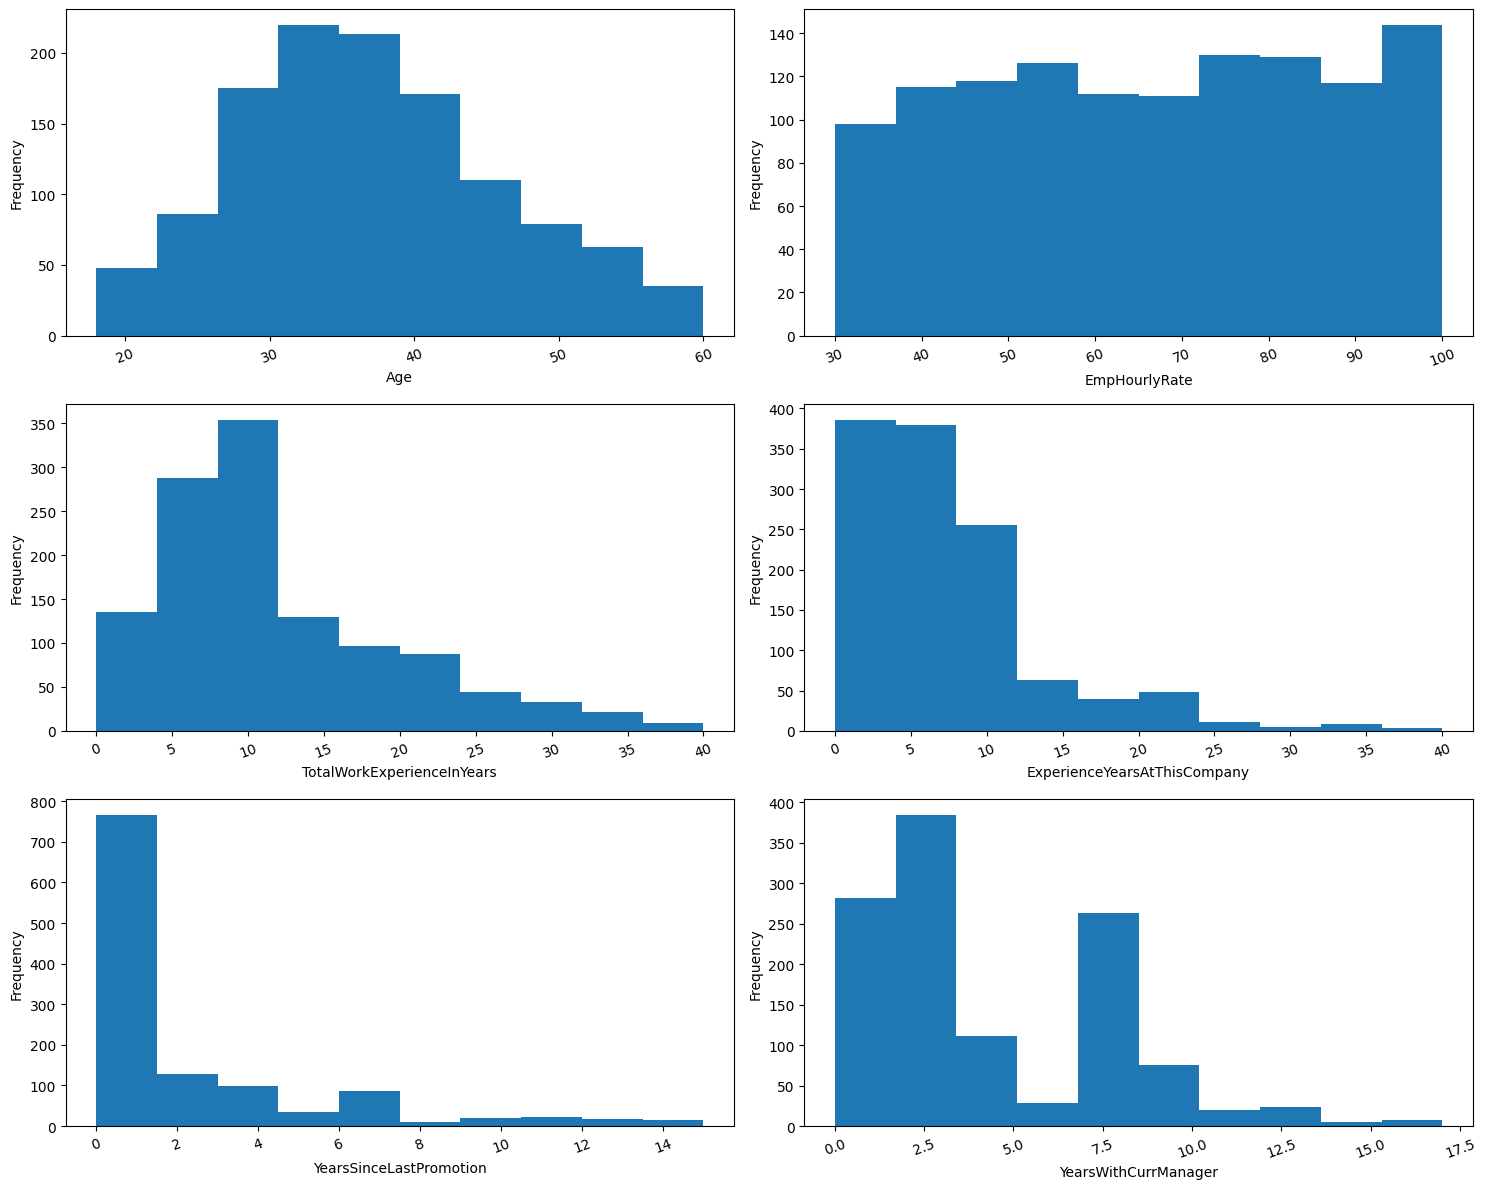

In [9]:
#univariate analysis --->analysing the attributes of a single variable for basic undestanding of the data
NumColumns = [
           "Age",
           "EmpHourlyRate",
           "TotalWorkExperienceInYears",
           "ExperienceYearsAtThisCompany",
           "YearsSinceLastPromotion",
           "YearsWithCurrManager"
           
           ]

axes = data_eda[NumColumns].hist(figsize=(15,12),bins=10,grid=False)
for ax in axes.flatten():
    title = ax.get_title()
    ax.set_xlabel(title)
    ax.set_ylabel("Frequency")
    ax.set_title("")
    ax.tick_params(axis='x',rotation=20)

plt.tight_layout() 
plt.show()  


**Observations and coclusions**

- Age---->Most employees lies between 25-45yrs of age, peaking around 30-35yrs.The elderly(50+yrs) are few.Having fewer older employees puts the business at a risk of losing institutional knowledge. On the other hand, younger employees is good for long term retention and growth but the business adopt a policy where it pairs the young and the old for knowledge transference to ensure maximum growth.
- Employees hourly rates are fairly spread with some bundles.This may be due to different job levels,years of experience and,or department.
- Total work experience in years;most have less than 15yrs of experience which indicates a mid-career workforce. Training and mentoring can help build expertise and for those with long years of experience,leadership and specialised roles can help in retaining them.
- Years since last promotion;Most promotions are recent(0-2yrs) which shows career progression but there are some which goes up to 15yrs and that indicates stagnation. A clear promotion policy should be adopted for balance and motivation.
- Years with current manager;The duration for most employees is 0-5yrs and this frequent change may affect performance. Others have lasted for more than 15yrs with the same manager this can cause complacency due to familiarity. There should be a balance mostly by offering leadership training for fresh leadership perspectives.






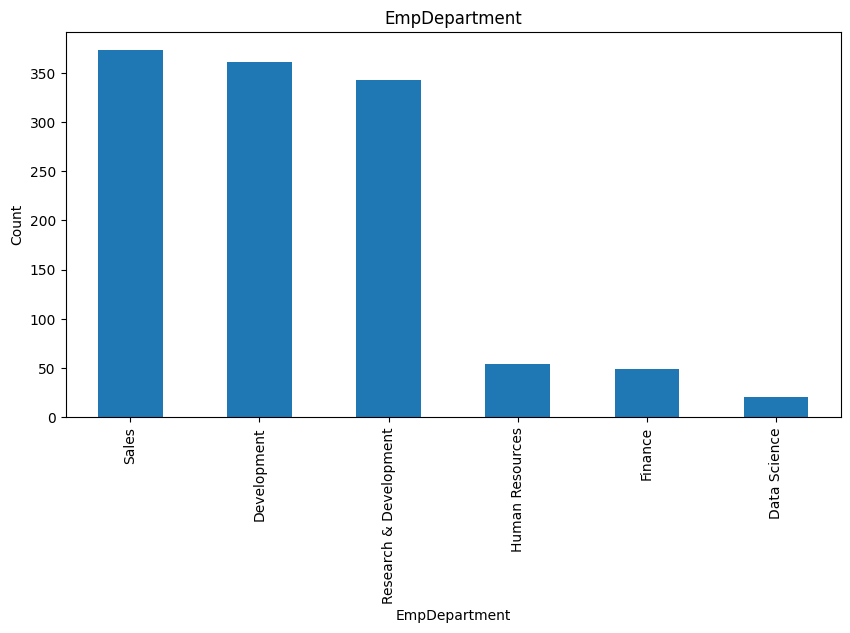

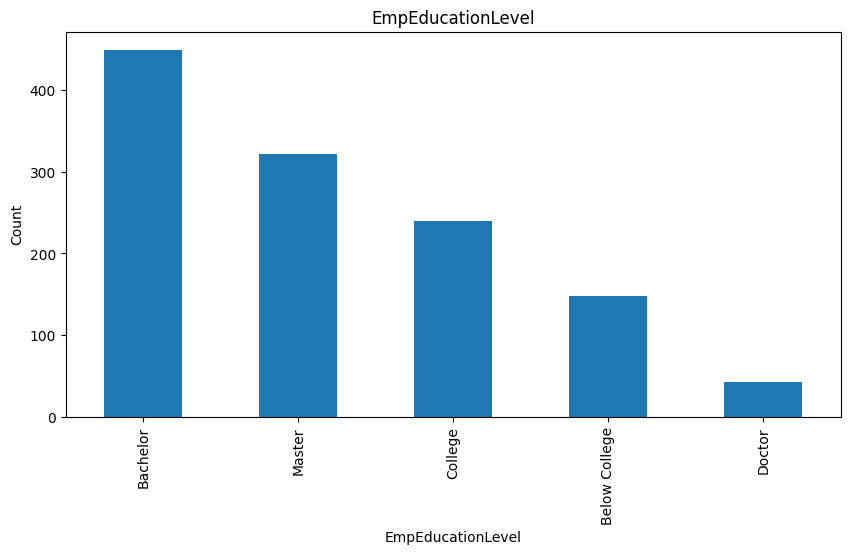

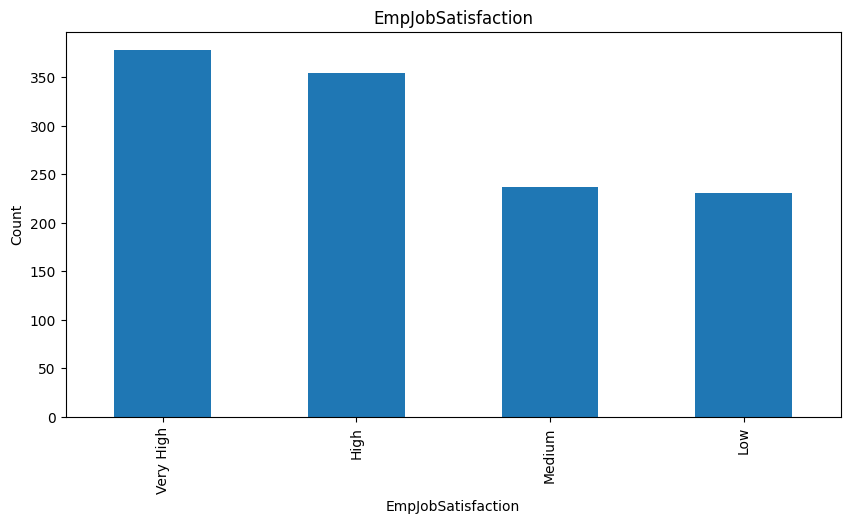

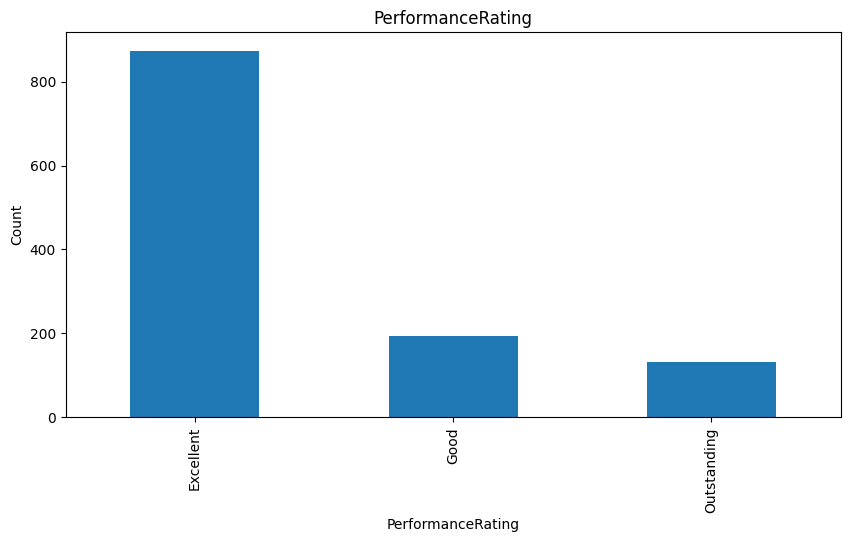

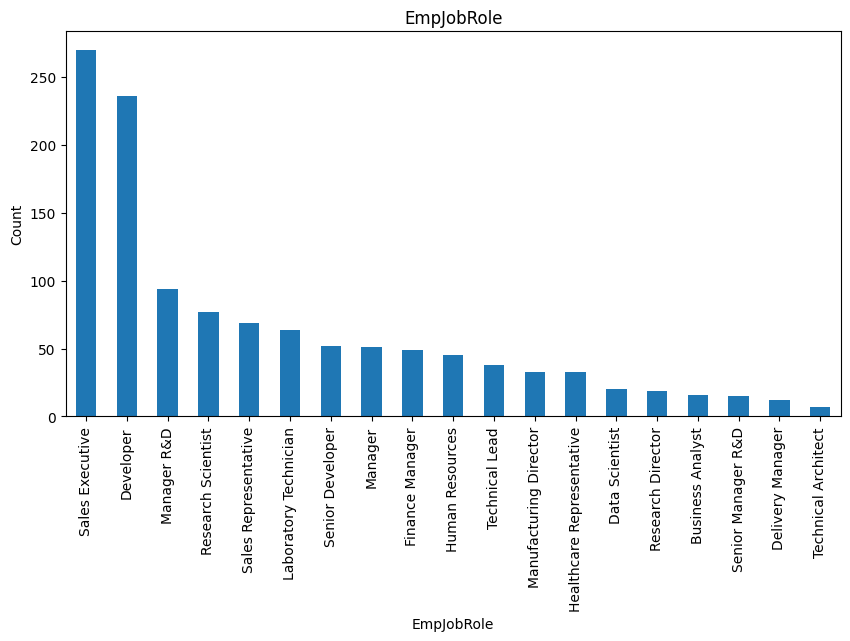

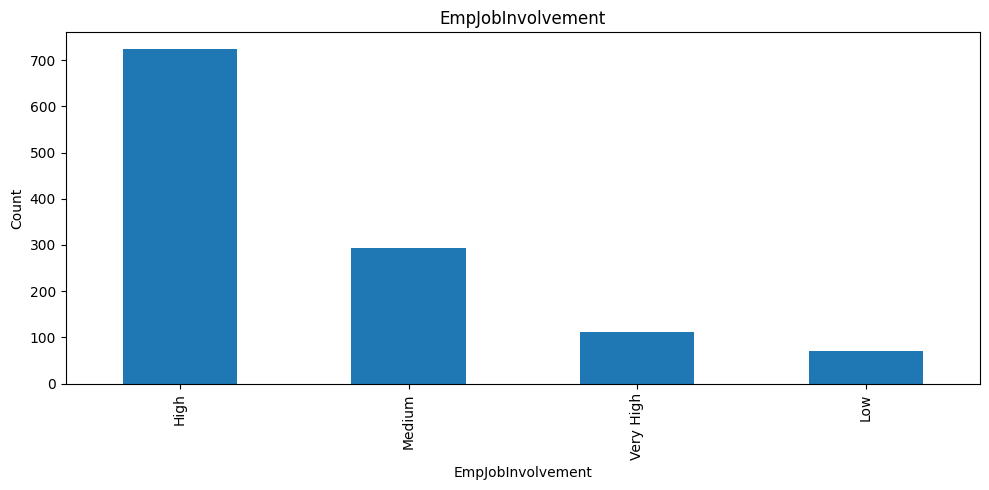

In [10]:
CatColumns =[ "EmpDepartment",
           "EmpEducationLevel",
           "EmpJobSatisfaction",
           "PerformanceRating",
           "EmpJobRole",
           "EmpJobInvolvement"
        ] 


for col in CatColumns:
    plt.figure(figsize=(10,5))
    ax= data_eda[col].value_counts().plot(kind='bar')
   
    ax.set_title(col)
    ax.set_ylabel("Count")
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()    

<Figure size 800x500 with 0 Axes>

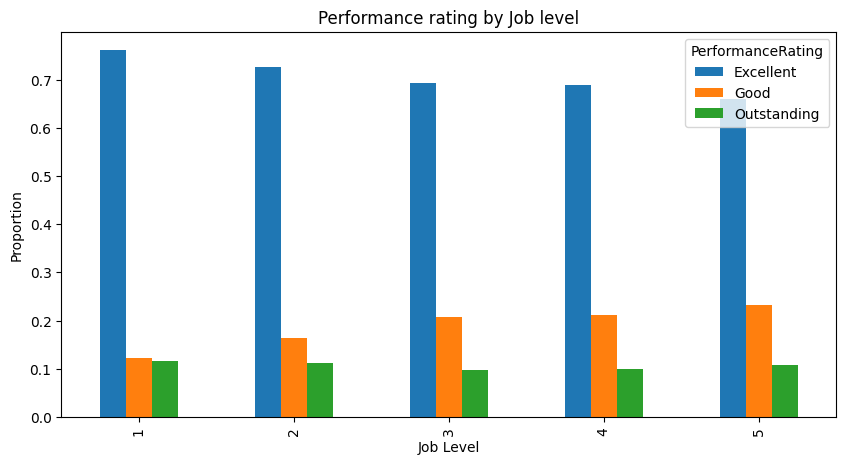

In [11]:
#bivariate analysis --->analysing two variables at a time and how they affect each other
#job level and performance rating
pd.crosstab(data_eda["EmpJobLevel"], data_eda["PerformanceRating"])

plt.figure(figsize=(8,5))
data_eda.groupby("EmpJobLevel")["PerformanceRating"].value_counts(normalize=True).unstack().plot(kind="bar",figsize=(10,5))
plt.title("Performance rating by Job level")
plt.xlabel("Job Level")
plt.ylabel("Proportion")
plt.show()


<Figure size 700x400 with 0 Axes>

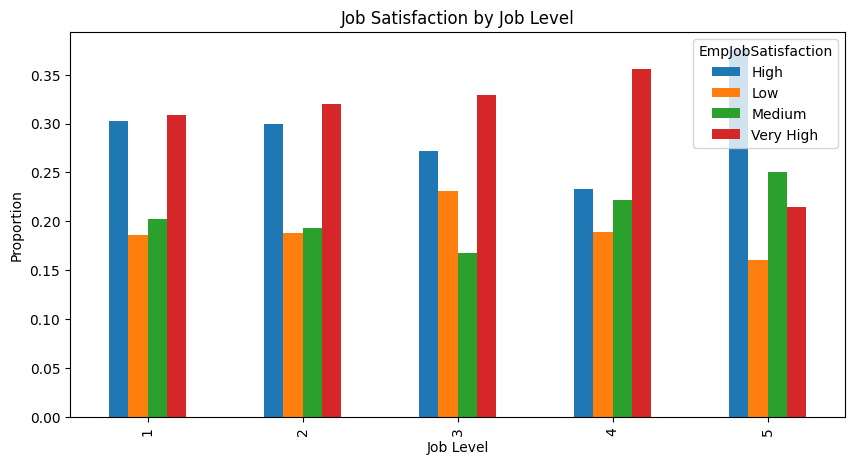

In [12]:
#job level and job satisfaction
pd.crosstab(data_eda["EmpJobLevel"],data_eda["EmpJobSatisfaction"])

plt.figure(figsize=(7,4))
data_eda.groupby("EmpJobLevel")["EmpJobSatisfaction"].value_counts(normalize=True).unstack().plot(kind="bar", figsize=(10,5))
plt.title("Job Satisfaction by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Proportion")
plt.show()

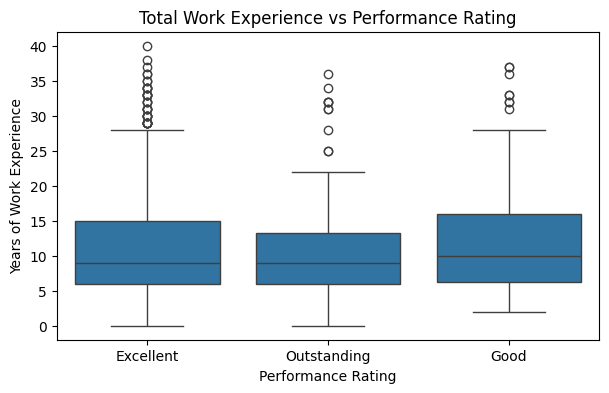

In [13]:
#work experience and performance rating
plt.figure(figsize=(7,4))
sns.boxplot(x=data_eda["PerformanceRating"], y=data_eda["TotalWorkExperienceInYears"])
plt.title("Total Work Experience vs Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Years of Work Experience")
plt.show()



**Observation and conclusion**
- Employees rated excellent and good tends to have more years of experience as compared to those rated outsanding.Excellent group shows widest range of experience.
- High performance therefore, does not correlate with more years of experience. This suggests that training,skills development and role fit may be more important drivers of top preformance than tenure alone.

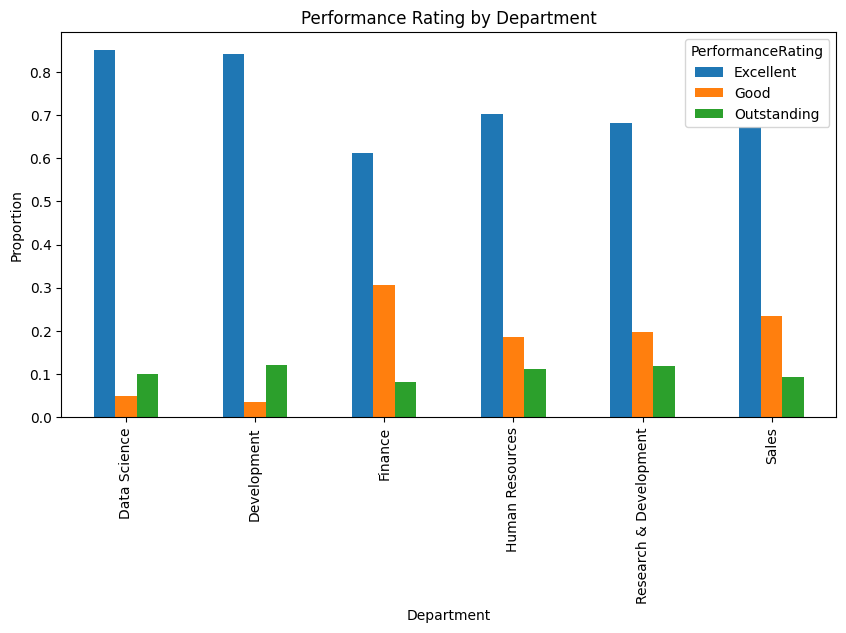

In [14]:
#DepartmentWise Performance
pd.crosstab(data_eda["EmpDepartment"],data_eda["PerformanceRating"])
data_eda.groupby("EmpDepartment")["PerformanceRating"].value_counts(normalize=True).unstack().plot(kind="bar",figsize=(10,5))
plt.title("Performance Rating by Department")
plt.xlabel("Department")
plt.ylabel("Proportion")
plt.show()



**Observations and conclusions**
- "Excellent" ratings seems to dominate all departments.This may be due to lenient evaluations and this makes it difficult to differentiate between excellent and average performers and in return may dilute effectiveness.
- Finance department shows highest "Good" ratings and we can assume that they probably have strict rules. It could also indicate different performance expectations or work pressure which makes it hard to attain excellent scores.
- Development and Research and Development departments almost have similar patterns.The rating is sable and mostly aligned with company's expectations
- HR has abalanced distribution. The managers may follow stricter rules for evaluation.
- Sales ratings may reflect a target-driven performance variance,market changes and sales team pressure affecting the performance scores.
- "Outstanding" ratings are low and consistent across all departments.This might mean that the company limiys this rating and only high achievers are recognised in all departments compared.

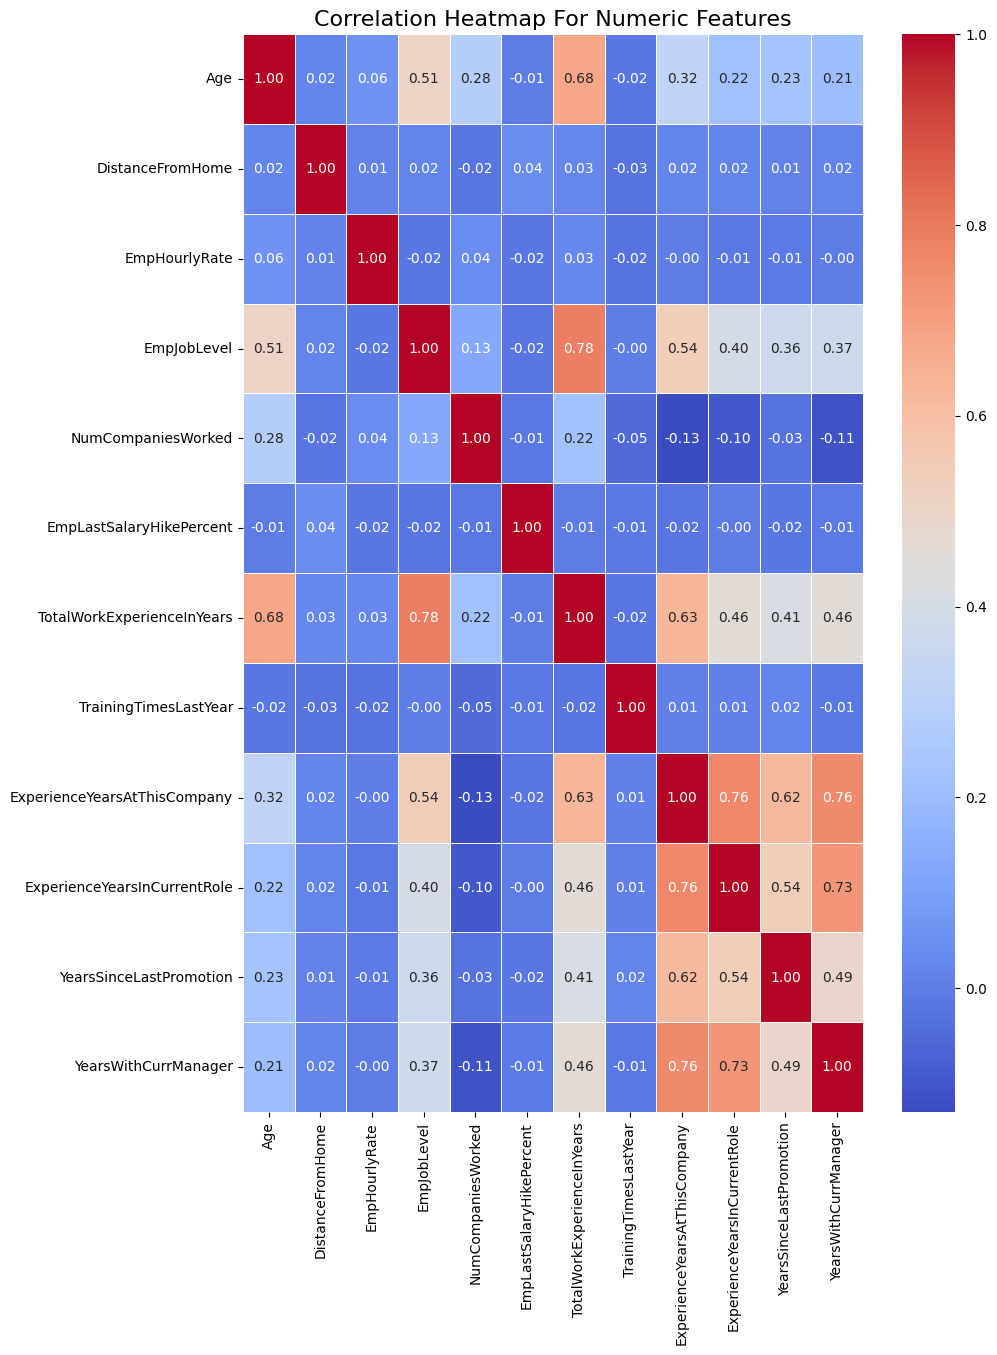

In [15]:
#multivariate analysis --> we will analyze multiple variables at one using a a heatmap
Numeric_df = data_eda.select_dtypes(include="number")  #selects only numeric columns
corr_matrix = Numeric_df.corr()

plt.figure(figsize=(10,14))
sns.heatmap(corr_matrix,annot=True,fmt=".2f", cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap For Numeric Features", fontsize=16)
plt.show()


**Observations and conclusion**
- Job level and total work experience has a very strong correlation(0.78) i.e the higher the job level,the greater the total career experience.It shows that the company's promotions are experience-based,but,they should make sure that high performers with low tenures are not overlooked.
- Experience years in the company and the years in current role has a strong correlation of 0.76. That means that employees stay in same role for most of their tenure. This shows lack of internal mobility which may cause to career stagnation which in turn can lead to attrition.
- Experience years in the company and years with current manager also has a 0.76 correlation and shows that employees stay with the same manager for most of their time,which can lead to stable employee-manager relationship.But,it can also lead to dependency and complacency due to familiarity.There should be exposure to new leadership styles.
- Age and total work experience has a 0.68 correlation.Naturally,older employees are expected to have more experience.These shows an experienced workforce.It also may pose a problem for retention of older employees nearing retirement and therefore knowledge transfer should be considered.
- Years since last promotion and experience years in the current role has a correlation of 0.54;people who stay longer in the same role experience longer times without promotion.This can lead to career stagnation.
- Other features like distance from home,hourly rate and training time last year has very weak correlations with the others.
- INX Future Inc has strengths in their experience-based promotions,manager-employee stability and no geographical biasness but it is lacking in some areas which cause risks such as career stagnanation,limited role mobility,training inefficiency and possible misallignments between performance and career growth.







## MODEL BUILDING

In [16]:
#encoding categorical columns
for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].astype("category").cat.codes

In [17]:
#preparing x and y
X=data.drop(columns=["PerformanceRating","EmpNumber"],errors='ignore',axis=1)
y=data["PerformanceRating"]

In [18]:
#checking class distribution
display(y.value_counts(normalize=True))

PerformanceRating
3    0.728333
2    0.161667
4    0.110000
Name: proportion, dtype: float64

The class distribution is imbalanced

In [19]:
#stratified split--->since our classes are imbalance,we are applying stratification 
#this ensures all classes are proportionally represented both in training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

print("Train Shape:",X_train.shape)
print("Test Shape:",X_test.shape)

Train Shape: (900, 26)
Test Shape: (300, 26)


In [20]:
#models
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train,y_train)
y_pred_lr = log_reg.predict(X_test)


dt = DecisionTreeClassifier(criterion = 'gini',max_depth=None,random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)


rf = RandomForestClassifier(n_estimators=300,max_depth=None,random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

models = {
           "Logistic Regression":(log_reg,y_pred_lr),
           "Decision Tree":(dt,y_pred_dt),
           "Random Forest":(rf,y_pred_rf)
}

for name,(model,preds) in models.items():
    print(f"\n *********{name}********")
    print("Accuracy:", accuracy_score(y_test,preds))
    print(classification_report(y_test,preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test,preds))




 *********Logistic Regression********
Accuracy: 0.82
              precision    recall  f1-score   support

           2       0.59      0.49      0.53        49
           3       0.86      0.92      0.89       218
           4       0.88      0.64      0.74        33

    accuracy                           0.82       300
   macro avg       0.77      0.68      0.72       300
weighted avg       0.81      0.82      0.81       300

Confusion Matrix:
 [[ 24  25   0]
 [ 14 201   3]
 [  3   9  21]]

 *********Decision Tree********
Accuracy: 0.9066666666666666
              precision    recall  f1-score   support

           2       0.81      0.80      0.80        49
           3       0.94      0.94      0.94       218
           4       0.85      0.85      0.85        33

    accuracy                           0.91       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.91      0.91      0.91       300

Confusion Matrix:
 [[ 39  10   0]
 [  8 205   5]
 [  1   

***Logistic Regression***
- Had ana accuracy of 0.82.
- Class 2 with 49 samples showed poor performance having f1 as 0.53
- class 3 with 218 samples had a strong performance with f1 of 0.89
- Class 4 had f1 of 0.74 which was fair,having 33 samples.
- Overall weighted f1 was 0.81,but the model showed weaakness in predicting the minorities(2 and 4) 

***Decision Tree***
- Had an accuracy of 0.906
- class 2 had an F1 of 0.80,class 3 had 0.94 and class 4 had 0.85
- This model showed better predictions in minority classes,an improvement from Logistic Regression

***Random Forest***
- Showed an accuracy of 0.933
- Class 2 had F1 of 0.86(very big improvement from the other models),Class 3 had 0.96(an almost perfect score) while class 4 had 0.88.
- This model proved to handle the imbalances well.


Random Forest was best overall due to it's ability to handle imbalances which proved to be a problem for Logistic Regression.
- Due to the imbalance of data,we decided to use F1 score. 





In [21]:
#retraining the best model-Random Forest
best_model = RandomForestClassifier(n_estimators=500,max_depth=None,min_samples_split=2,random_state=42)
best_model.fit(X,y)     #training the full dataset

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
#saving the model for later deployment
import pickle
with open("Random_Forest_Model.pkl", "wb") as f:
    pickle.dump(best_model,f)

### Feature Importance

In [23]:
#feature importances from the best model
importances = pd.DataFrame({
    "Feature":X.columns,
    "Importance":best_model.feature_importances_}).sort_values(by="Importance",ascending=False)

importances.head(10)

,Feature,Importance
16,EmpLastSalaryHikePercent,0.217477
9,EmpEnvironmentSatisfaction,0.207242
23,YearsSinceLastPromotion,0.093857
22,ExperienceYearsInCurrentRole,0.041502
5,EmpJobRole,0.040031
4,EmpDepartment,0.038738
10,EmpHourlyRate,0.036354
21,ExperienceYearsAtThisCompany,0.032467
0,Age,0.031587
20,EmpWorkLifeBalance,0.028961


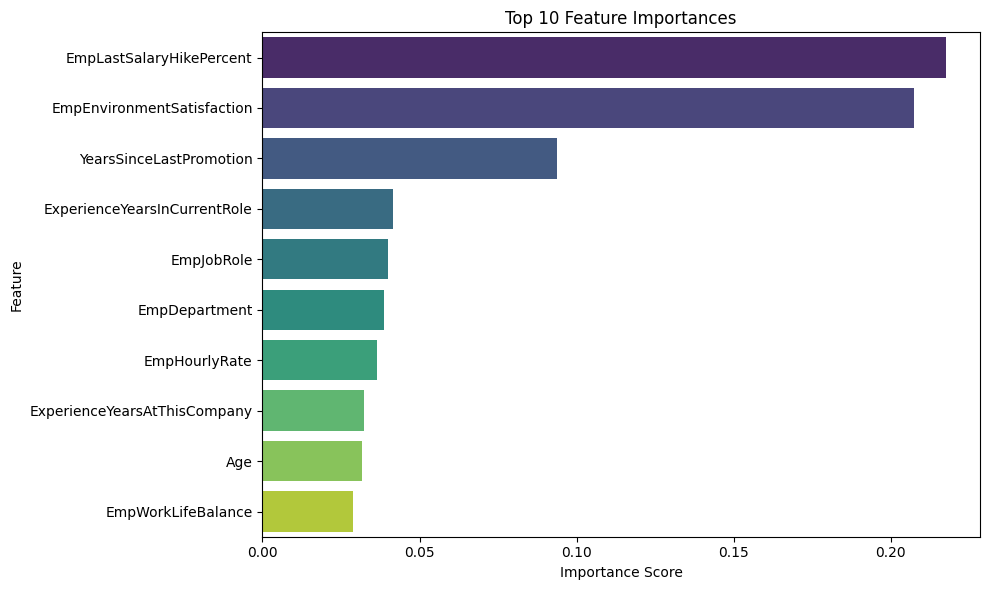

In [24]:
top_n = importances.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance",y="Feature",data=top_n,palette='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [25]:
X.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')